# OnePlus Mobile Review Sentiment Analysis
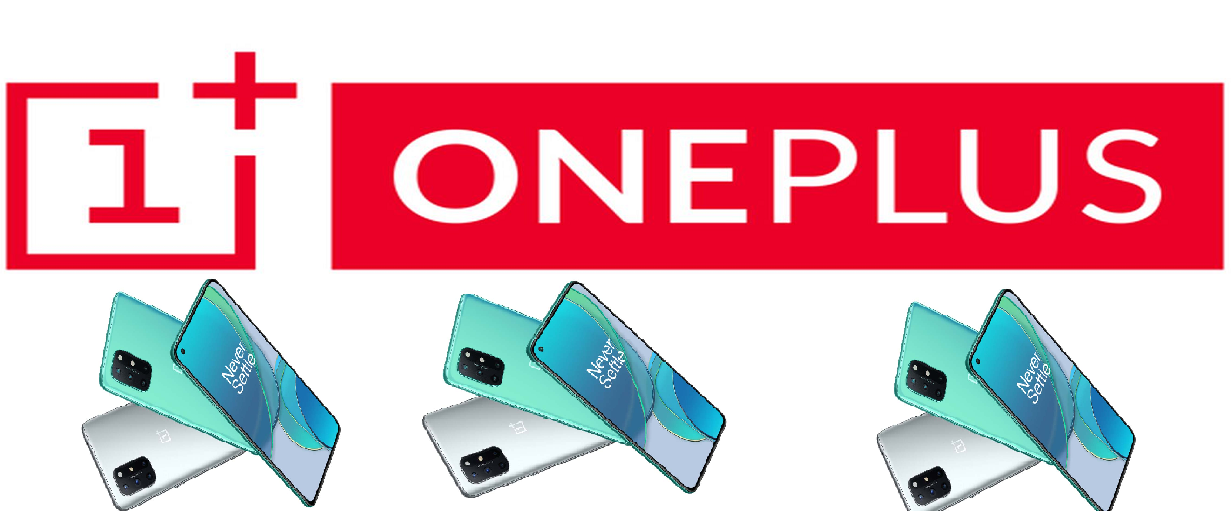

### Import required Libaries

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from datetime import datetime
from nltk.tokenize import sent_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import heapq

## Load data

In [44]:
def get_soup(url): 
    session = requests.session()
    session.headers['User-Agent'] = "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"
    session.get("https://www.amazon.in/")
    r= session.get(url)
    if r.status_code==200:
        soup=BeautifulSoup(r.text,'html.parser')
    else:
        print("Amazon site response. Error_code:",r.status_code)
    return soup

In [45]:
def get_reviews(soup):
    page=[]
    cust={}
    reviews=soup.find_all('div',{'data-hook':"review"})
    try:
        for item in reviews:
            cust={
            'Customer':item.find(class_="a-profile-name").text.strip(),
            'Date':date_extract(item.find("span",{"data-hook":"review-date"}).text),
            'Topic':item.find('a',{'data-hook':'review-title'}).text.strip(),
            'Rating':float(item.find('i',{'data-hook':"review-star-rating"}).text[:3]),
            'Content':item.find('span',{'data-hook':'review-body'}).text.strip()}
            page.append(cust)
    except:
        pass
    return page

In [46]:
def date_extract(date):
    n=re.search(r"\d",date).start()
    return(date[n:])

In [70]:
df=pd.DataFrame()

for x in range(200,250):
    print(f"Getting page {x}")
    soup=BeautifulSoup()
    if x==1:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Forest-Green-Storage-SuperVOOC/product-reviews/B09WRKHWP7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
    else:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Forest-Green-Storage-SuperVOOC/product-reviews/B09WRKHWP7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")
    page=get_reviews(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break
    df=pd.concat([df,pd.DataFrame(page)],axis=0)

Getting page 200


### Here I scraped the Data page wise and stored into local machines

In [71]:
df.shape

(0, 0)

In [76]:
df1=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page1.csv')
df2=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page2.csv')
df3=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page3.csv')
df4=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page4.csv')
df5=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page5.csv')
df6=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page6.csv')
df7=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page7.csv')

In [85]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7])
df.head()

,Unnamed: 0,Customer,Date,Topic,Rating,Content
0,0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...
1,1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc..."
2,2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike
3,3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...
4,4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...


In [86]:
df.shape

(1980, 6)

In [87]:
df.columns

Index(['Unnamed: 0', 'Customer', 'Date', 'Topic', 'Rating', 'Content'], dtype='object')

### Drop Unnamed:0 column

In [88]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns

Index(['Customer', 'Date', 'Topic', 'Rating', 'Content'], dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1980 non-null   object 
 1   Date      1980 non-null   object 
 2   Topic     1980 non-null   object 
 3   Rating    1980 non-null   float64
 4   Content   1902 non-null   object 
dtypes: float64(1), object(4)
memory usage: 92.8+ KB


### Missing rows

In [90]:
df.isna().sum()

Customer     0
Date         0
Topic        0
Rating       0
Content     78
dtype: int64

### Drop NAN rows 

In [91]:
df.dropna(inplace=True)
df.isna().sum()

Customer    0
Date        0
Topic       0
Rating      0
Content     0
dtype: int64

In [92]:
df.shape

(1902, 5)

### Rating Count

In [94]:
df['Rating'].value_counts()

5.0    861
1.0    413
4.0    342
3.0    171
2.0    115
Name: Rating, dtype: int64

#### About 50% ratings on the product are 5 star.

### Topic and Content are Similar kind columns, Topic are the highlight of the Content, so we can concat these to columns to create a New column called Text.

In [100]:
df['Text']=df['Topic']+ " " +df['Content']
df.columns=df.columns.str.lower()
df.head()

,customer,date,topic,rating,content,text
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...,Best option in 35k category. I am using OnePlu...
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc...","Camera Stunning camera and breathing design, t..."
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,All are good but Battery back up is not good B...
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...,"Battery live not good, it works very less time..."
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...,Fast battery drainage In only 3 hrs 50% batter...


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   customer  1902 non-null   object 
 1   date      1902 non-null   object 
 2   topic     1902 non-null   object 
 3   rating    1902 non-null   float64
 4   content   1902 non-null   object 
 5   text      1902 non-null   object 
 6   polarity  1902 non-null   float64
dtypes: float64(2), object(5)
memory usage: 118.9+ KB


### Creating New column Polarity for Sentiment classification

In [121]:
df['polarity']=[TextBlob(i).sentiment[0] for i in df['text']]
df.head()

,customer,date,topic,rating,content,text,polarity
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...,Best option in 35k category. I am using OnePlu...,0.312348
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc...","Camera Stunning camera and breathing design, t...",0.300000
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,All are good but Battery back up is not good B...,0.087500
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...,"Battery live not good, it works very less time...",-0.190061
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...,Fast battery drainage In only 3 hrs 50% batter...,-0.020000


### Sentiment Class

In [127]:
def sentiments(polarity):
    if polarity>0:
        return 'positive'
    elif polarity<0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment']=df['polarity'].apply(sentiments)
df.head()

,customer,date,topic,rating,content,text,polarity,sentiment
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...,Best option in 35k category. I am using OnePlu...,0.312348,positive
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc...","Camera Stunning camera and breathing design, t...",0.300000,positive
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,All are good but Battery back up is not good B...,0.087500,positive
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...,"Battery live not good, it works very less time...",-0.190061,negative
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...,Fast battery drainage In only 3 hrs 50% batter...,-0.020000,negative


### Count of sentiment

In [128]:
df['sentiment'].value_counts()

positive    1347
negative     409
neutral      146
Name: sentiment, dtype: int64

#### 70% Reviews are Positive.

### Data Preprocessing

#### To remove some words or replace

In [134]:
def decontract(text):
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

In [135]:
stopword=stopwords.words('english')

def clean(text):
    text = str(text).lower()
    text = decontract(text)                                            # decontracting
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)                   # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()                      # removing html tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub("\S*\d\S*", "", text).strip()                        # removing the words with numeric digits
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text)                             # removing non-word characters
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

#### Apply above functions to clean the data

In [136]:
df["text"] = df["text"].apply(clean)
df.head()

,customer,date,topic,rating,content,text,polarity,sentiment
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...,best option categori use oneplus one month fir...,0.312348,positive
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc...",camera stun camera breath design processor abl...,0.300000,positive
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,good batteri back good batteri back dislik,0.087500,positive
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...,batteri live good work less time batteri poor ...,-0.190061,negative
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...,fast batteri drainag hrs batteri get drain bac...,-0.020000,negative


### Plot WordCloud for Positive, Negative and Neutral Sentiment

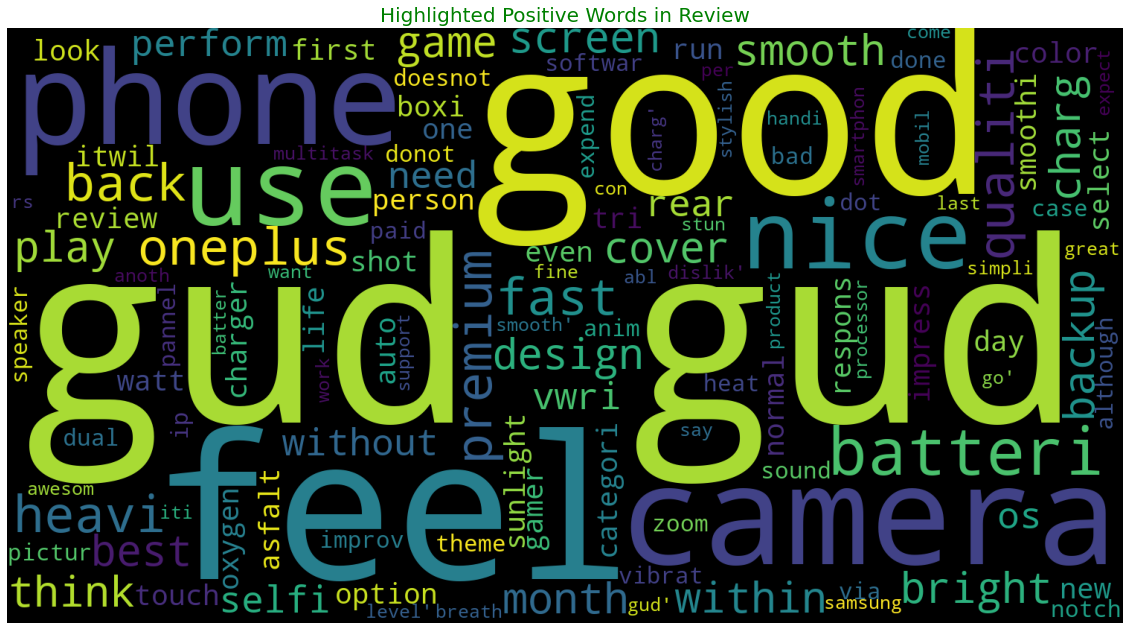

In [137]:
graph=df[df['sentiment']=='positive']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Positive Words in Review", color='green', fontsize=20)
plt.axis('off');

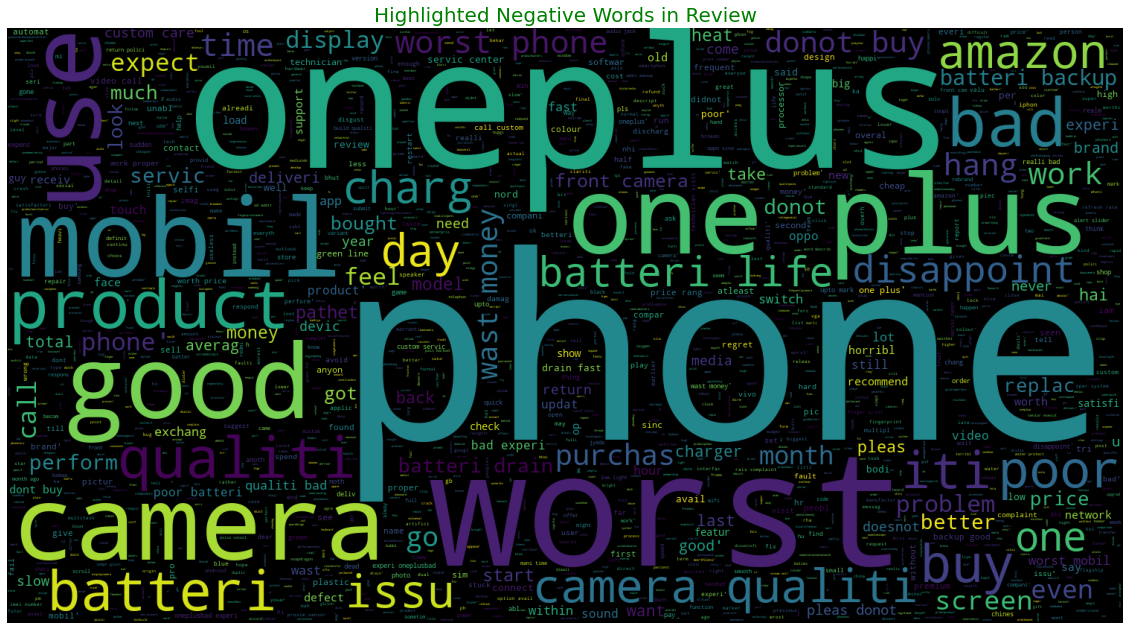

In [138]:
graph=df[df['sentiment']=='negative']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Negative Words in Review", color='green', fontsize=20)
plt.axis('off');

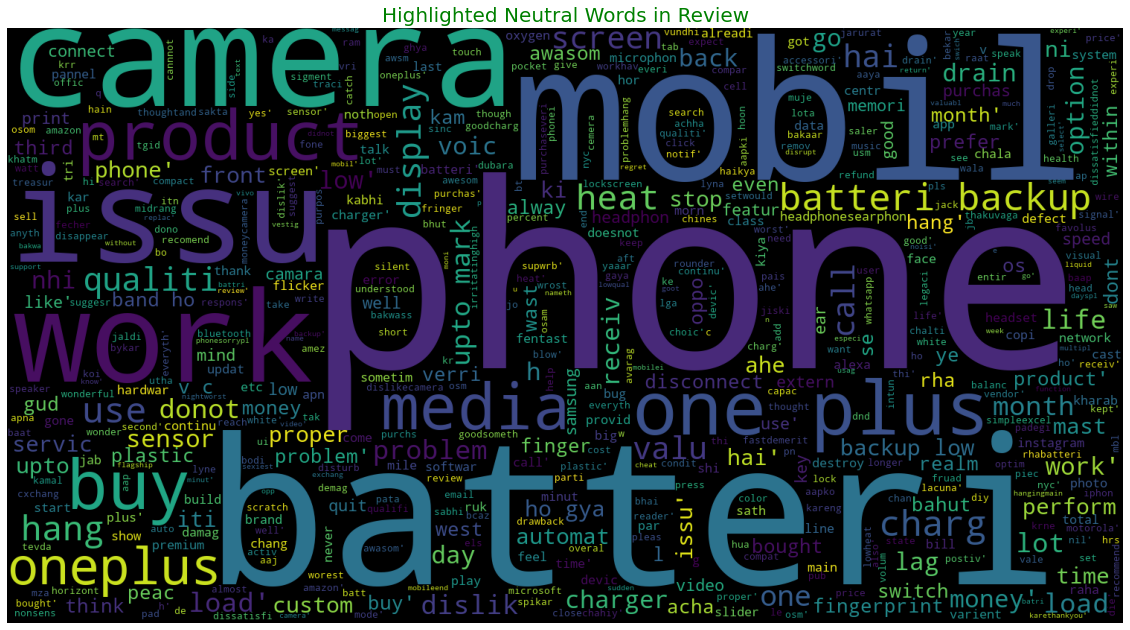

In [139]:
graph=df[df['sentiment']=='neutral']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Neutral Words in Review", color='green', fontsize=20)
plt.axis('off');

## Model Developement

In [143]:
df['sentiment_class']=df['sentiment'].replace({'positive':2,'neutral':1,'negative':0})
df['sentiment_class'].value_counts()

2    1347
0     409
1     146
Name: sentiment_class, dtype: int64

### Dependent and Independent features

In [181]:
X=df['text']
y=df['sentiment_class']

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1711,)
(191,)
(1711,)
(191,)


### Convert text to numeric using TD-IDF vectorizer

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train).toarray()
x_test_tf=tf_fitted.transform(x_test).toarray()
print(x_train_tf.shape)
print(x_test_tf.shape)

(1711, 3460)
(191, 3460)


### Classification Model

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [187]:
models = {
    "LR": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "SVM": SVC(random_state=0),
    "NB": GaussianNB(),
    "GB": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "ADA": AdaBoostClassifier(n_estimators=50, random_state=0)
}

In [188]:
for name, model in models.items():
    print('Training Model:', name)
    model.fit(x_train_tf, y_train)
    y_pred = model.predict(x_test_tf)
    print('Training Accuracy:', accuracy_score(y_train, model.predict(x_train_tf)))
    print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Out of {} test records, {} miss classified'.format(y_test.shape[0], sum(y_test!=y_pred)))
    print('*-*'*30)
    print('\n')

Training Model: LR
Training Accuracy: 0.9094097019286966
Prediction Accuracy: 0.8481675392670157
Confusion Matrix:
 [[ 26   0  11]
 [  0   0  16]
 [  2   0 136]]
Out of 191 test records, 29 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: DT
Training Accuracy: 1.0
Prediction Accuracy: 0.8429319371727748
Confusion Matrix:
 [[ 27   2   8]
 [  0  12   4]
 [ 10   6 122]]
Out of 191 test records, 30 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: RF
Training Accuracy: 1.0
Prediction Accuracy: 0.8848167539267016
Confusion Matrix:
 [[ 28   0   9]
 [  0  10   6]
 [  7   0 131]]
Out of 191 test records, 22 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: XGB
Training Accuracy: 0.9935710111046172
Prediction Accuracy: 0.8743455497382199
Confusion Matrix:
 [[ 26   0  11]
 

### XGBoost classifier has Hight Training and Testing Accuracy. Select this Model to Predict Sentiment of Product Review.

In [196]:
xgb=XGBClassifier()
xgb.fit(x_train_tf,y_train)
y_pred=xgb.predict(x_test_tf)
print('Training Accuracy:', accuracy_score(y_train, y_train))
print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Out of {} test records, {} miss classified'.format(y_test.shape[0], sum(y_test!=y_pred)))

Training Accuracy: 1.0
Prediction Accuracy: 0.8743455497382199
Confusion Matrix:
 [[ 26   0  11]
 [  2  12   2]
 [  6   3 129]]
Out of 191 test records, 24 miss classified


### Test the Model

In [197]:
review=[
'''
I got (from OnePlus) the one with 128 GB.
Big problems withh bluetooth: can't find iPhone, JBL speaker, Bolttune headsets, Apple headsets, 
HP laptop, Nissan Murano... It finds my neighbor LG headsets and "ktchen TV", Lenovo laptop. Customer 
supplort didn't help much (doing a wireless reboot and later a factory reset didn't help).
I returned the phone (custom support decided it's a defective phone).
I got (from Amazon) the 256 GB version.
Well, identical problem.
I returned the phone.
''',
'''
I've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a 
different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second,
if you drop signal the phone doesn't automatically reconnect when you are back in the service area.
You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If 
you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast.
The battery last all day. The 120 screen scrolls flawlessly on pages.
''',
'''
Just that, a core function that should and would work o every high end phone is NOT working on one plus 11
''',
'''
Worst Product. Battery is bad. Camera is Bad.
'''
]

dd=pd.DataFrame(review, columns=['review'])
dd['review']=dd['review'].apply(lambda x : clean(x))
dd1=tf_fitted.transform(dd['review'])


pred=xgb.predict(dd1)
for i in pred:
    if i==2:
        print('Positive 😍')
    elif i==1:
        print('Neutral 🙂')
    else:
        print('Negative 😡')

Positive 😍
Positive 😍
Neutral 🙂
Negative 😡
